# Staking Log

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import mpld3

#Testing
import sympy
from sympy import solve, Symbol
x= Symbol('x')
solve(2**x-50,x)[0]
#log(20)

import math
math.log(50,2)

5.643856189774724

In [20]:
initial = 200
values = [5,10,10,20,50,110,30,5,30,50,71,6,2,20,15,40,20,10,1,5,1,3]
record = ['W','W','L','L','L','W','W','W','L','L','L','L','L','W','L','L','W','W','W','W','L','W']
stakeNum = range(1,len(values)+1)
checkpoints=[initial,124]
xStart = 0
xEnd=0

In [21]:
def totalArray(initial, stakes, conditions):
    runningTotal=[]
    rt = initial
    for i in range(len(stakes)):
        if conditions[i]=='W':
            rt += stakes[i]
            runningTotal.append(rt)
        else:
            rt -= stakes[i]
            runningTotal.append(rt)
    return runningTotal
runningTotal = totalArray(initial, values, record)

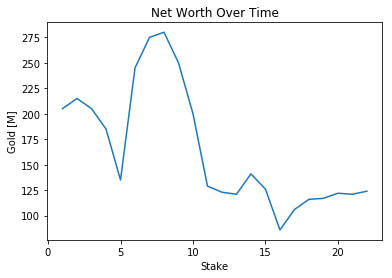

['W', 'W', 'L', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'L', 'W']
[205, 215, 205, 185, 135, 245, 275, 280, 250, 200, 129, 123, 121, 141, 126, 86, 106, 116, 117, 122, 121, 124]
range(1, 23)


In [22]:
fig = plt.plot(stakeNum,runningTotal)
plt.xlabel('Stake')
plt.ylabel('Gold [M]')
plt.title('Net Worth Over Time')
plt.show()

print(record)
print(runningTotal)
print(stakeNum)

In [23]:
def addStake(val,condition):
    if condition=='W':
            runningTotal.append(runningTotal[-1]+val)
    elif condition=='L':     
        runningTotal.append(runningTotal[-1]-val)
    values.append(val)
    record.append(condition)
    stakeNum = range(1,len(values)+1)
    red_patch = mpatches.Patch(color='red', label='Current Val :'+str(runningTotal[-1]))
    plt.legend(handles=[red_patch])
    #print(record)
    #print(runningTotal)
    #print(stakeNum)
    #plt.show()
    plt.plot(stakeNum,runningTotal)
    #print(stakeNum)
def startSession(start,vals):
    start=len(vals)+1
    #print(xStart)
    return start
    
def endSession():
    xEnd=len(values)+1
    plt.xlabel('Stake (Occurence)')
    plt.xlim(xStart,xEnd)
    plt.ylabel('Gold [M]')
    plt.title('Net Worth Over Time')
    plt.show()
    checkpoints.append(runningTotal[-1])
    print('Profit for this session is : '+str(checkpoints[-1]-checkpoints[-2])+'M')

# Session 1

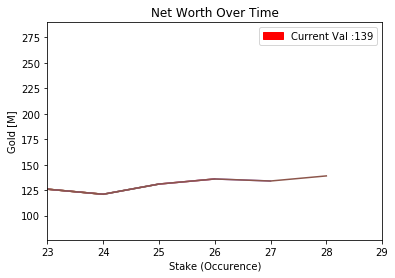

Profit for this session is : 15M


In [24]:
xStart = startSession(xStart,values) #var value won't update, fix later
#print(xStart)

addStake(2,'W')
addStake(5,'L')
addStake(10,'W')
addStake(5,'W')
addStake(2,'L')
addStake(5,'W')
endSession()
#22W-7L=+15

#plt.show()

# Session 2

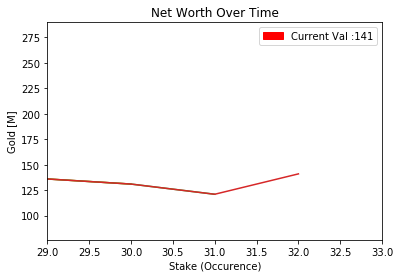

Profit for this session is : 2M


In [26]:
xStart = startSession(xStart,values) 
addStake(3,'L')
addStake(5,'L')
addStake(10,'L')
addStake(20,'W')
#20W-18L=+2
endSession()


# Session 3

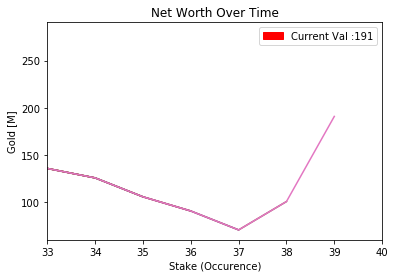

Profit for this session is : 50M


In [27]:
xStart = startSession(xStart,values) 
addStake(5,'L')
addStake(10,'L')
addStake(20,'L')
addStake(15,'L')
addStake(20,'L')
addStake(30,'W')
addStake(90,'W')
endSession()

# Martingale Simulator

In [44]:
#stake (baseVal)
#double if you lose
# [startingCash] [safety] -> [baseVal] [loss probability] [stake array]
#any stake value is: baseVal*2^(n-1) where n is the stake Number
#1, stake = baseVal
#2, stake = 2 x baseVal
#your last stake should be half your starting cash
#baseVal*2^(N-1)=sc/2 where N is the total number of stakes it takes to get cleaned
#baseVal*2^N=sc
#all values are in Million Gold Pieces
def martingalePlanner(sc,risk):
    baseVal={'low' : sc/(2**12), #12 stakes
             'med' : sc/(2**8), #8 stakes 
             'high': sc/(2**6) #6 stakes
            }
    stakesToClean={'low' : 12,
                   'med' : 8, 
                   'high': 6 
                    }
    
    if risk=='showAll':
        print('For low risk, your base stake should be: '+str(baseVal['low']))
        print('For medium risk, your base stake should be: '+str(baseVal['med']))
        print('For high risk, your base stake should be: '+str(baseVal['high']))
    else:
        print('For ' +str(risk)+' risk, your base stake should be: '+str(baseVal[risk]))
        print('There is a '+str(.5**stakesToClean[risk]*100)+'% chance that you will get cleaned.')
        stakeVals={'start':sc}
        for i in range(stakesToClean[risk]):
            stakeVals['Stake Number '+str(i+1)] = baseVal[risk]*2**i
        print(stakeVals)
            
        
        
    

In [45]:
martingalePlanner(200,'high')

For high risk, your base stake should be: 3.125
There is a 1.5625% chance that you will get cleaned.
{'start': 200, 'Stake Number 1': 3.125, 'Stake Number 2': 6.25, 'Stake Number 3': 12.5, 'Stake Number 4': 25.0, 'Stake Number 5': 50.0, 'Stake Number 6': 100.0}


# Session 4

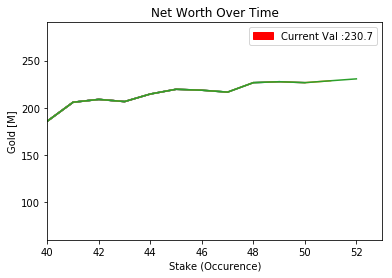

Profit for this session is : 39.69999999999999M


In [28]:
xStart = startSession(xStart,values) 
addStake(5,'L')
addStake(20,'W')
addStake(3,'W')
addStake(2.3,'L')
addStake(8,'W')
addStake(5,'W')
addStake(1,'L')
addStake(2,'L')
addStake(10,'W')
addStake(1,'W')
addStake(1,'L')
addStake(2,'W')
addStake(2,'W')
endSession()

# Session 5

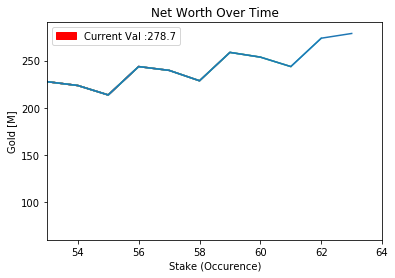

Profit for this session is : 48.0M


In [29]:
xStart = startSession(xStart,values) 
addStake(3,'L')
addStake(4,'L')
addStake(10,'L')
addStake(30,'W')
addStake(4,'L')
addStake(11,'L')
addStake(30,'W')
addStake(5,'L')
addStake(10,'L')
addStake(30,'W')
addStake(5,'W')
endSession()

In [48]:
checkpoints

[200, 124, 139, 141, 191, 230.7, 278.7]

# Session 6

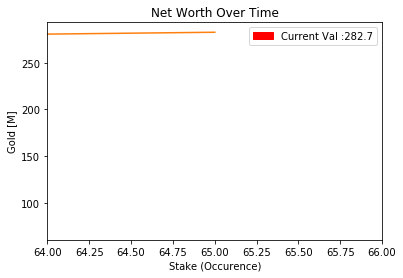

Profit for this session is : 4.0M


In [30]:
xStart = startSession(xStart,values) 
addStake(2,'W')
addStake(2,'W')
endSession()

# Session 7

In [50]:
martingalePlanner(283,'high')

For high risk, your base stake should be: 4.421875
There is a 1.5625% chance that you will get cleaned.
{'start': 283, 'Stake Number 1': 4.421875, 'Stake Number 2': 8.84375, 'Stake Number 3': 17.6875, 'Stake Number 4': 35.375, 'Stake Number 5': 70.75, 'Stake Number 6': 141.5}


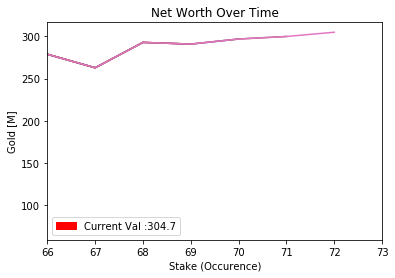

Profit for this session is : 22.0M


In [31]:
xStart = startSession(xStart,values) 
addStake(4,'L')
addStake(16,'L')
addStake(30,'W')
addStake(2,'L')
addStake(6,'W')
addStake(3,'W')
addStake(5,'W')
endSession()

# Session 8

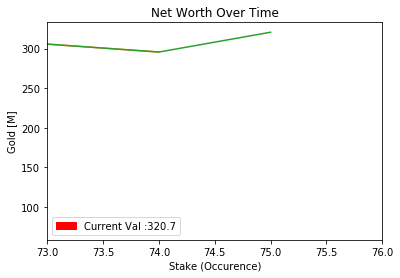

Profit for this session is : 16.0M


In [32]:
xStart = startSession(xStart,values) 
addStake(1,'W')
addStake(10,'L')
addStake(25,'W')
endSession()

# Session 9

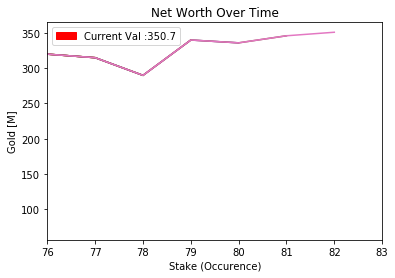

Profit for this session is : 30.0M


In [33]:
xStart = startSession(xStart,values) 
addStake(1,'L')
addStake(5,'L')
addStake(25,'L')
addStake(50,'W')
addStake(4,'L')
addStake(10,'W')
addStake(5,'W')
endSession()

# Session 10

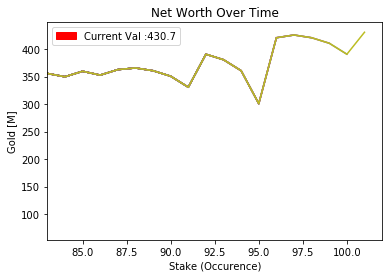

Profit for this session is : 80.0M


In [34]:
xStart = startSession(xStart,values) 
addStake(5,'W')
addStake(6,'L')
addStake(10,'W')
addStake(7,'L')
addStake(10,'W')
addStake(3,'W')
addStake(5,'L')
addStake(10,'L')
addStake(20,'L')
addStake(60,'W')
addStake(10,'L')
addStake(20,'L')
addStake(60,'L')
addStake(120,'W')
addStake(5,'W')
addStake(5,'L')
addStake(10,'L')
addStake(20,'L')
addStake(40,'W')
endSession()

# Withdrawl Made, Restart w/ 97M

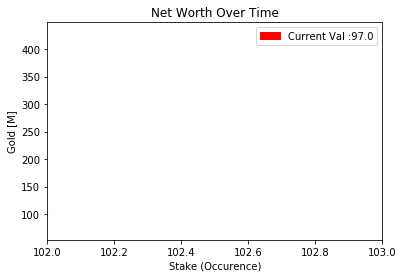

Profit for this session is : -333.7M


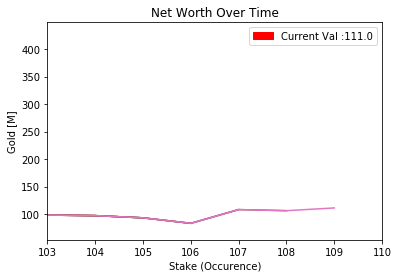

Profit for this session is : 14.0M


In [35]:
xStart = startSession(xStart,values) 
addStake(333.7,'L') #withdrawl
endSession()


xStart = startSession(xStart,values) 
#add axes call to remove first few stakes
addStake(1,'W')
addStake(1,'L')
addStake(4,'L')
addStake(10,'L')
addStake(25,'W')
addStake(2,'L')
addStake(5,'W')
endSession()

# Session 11

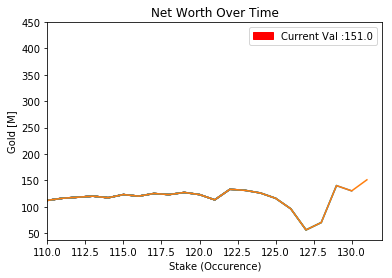

Profit for this session is : 40.0M


In [36]:
xStart = startSession(xStart,values) 
addStake(1,'W')
addStake(4,'W')
addStake(2,'W')
addStake(2,'W')
addStake(3,'L')
addStake(6,'W')
addStake(3,'L')
addStake(5,'W')
addStake(2,'L')
addStake(4,'W')
addStake(4,'L')
addStake(10,'L')
addStake(20,'W')
addStake(2,'L')
addStake(5,'L')
addStake(10,'L')
addStake(20,'L')
addStake(40,'L') # 56m > liquidating 
addStake(14,'W') # liquidation #70
addStake(70,'W') # would've been cleaned  #martingale still demands 10m
addStake(10,'L')
addStake(21,'W') #martin is sated XD
endSession() #session profit is 26 not 14, maybe split

In [57]:
# add start session to record previous stake index for plot range
# make start and end session range values
# add conditions for asset withdrawl and inoyt
# add average profit readout